<h3>- Note that I will use the Dataset with the Risk column </h3>

<h1>Welcome to my Kernel ! </h1>

<h2>I will do some Explorations through the German Credit Risk to understand their distribuitions and patterns. </h2>

Look for another interesting Kernels on https://www.kaggle.com/kabure/kernels<br>
Give me your feedback and if yo like this kernel, <b>votes up</b>

# Tables of Content:

**1. [Introduction](#Introduction)** <br>
    - Info's about datasets
**2. [Librarys](#Librarys)** <br>
    - Importing Librarys
    - Importing Dataset
**3. [Knowning the data](#Known)** <br>
    - 3.1 Looking the Type of Data
    - 3.2 Shape of data
    - 3.3 Null Numbers
    - 3.4 Unique values
    - 3.5 The first rows of our dataset
**4. [Exploring some Variables](#Explorations)** <br>
    - 4.1 Ploting some graphical and descriptive informations
**5. [Correlation of data](#Correlation)** <br>
	- 5.1 Correlation Data
**6. [Preprocess](#Preprocessing)** <br>
	- 6.1 Importing Librarys
	- 6.2 Setting X and Y
    - 6.3 Spliting the X and Y in train and test 
**7. 1 [Model 1](#Modelling 1)** <br>
    - 7.1.1 Random Forest 
    - 7.1.2 Score values
    - 7.1.3 Cross Validation 
**7. 2 [Model 2](#Modelling 2)** <br>
    - 7.2.1 Logistic Regression 
    - 7.2.2 Score values
    - 7.2.3 Cross Validation 
    - 7.2.4 ROC Curve

<a id="Introduction"></a> <br>


# **1. Introduction:** 
<h2>Context</h2>
The original dataset contains 1000 entries with 20 categorial/symbolic attributes prepared by Prof. Hofmann. In this dataset, each entry represents a person who takes a credit by a bank. Each person is classified as good or bad credit risks according to the set of attributes. The link to the original dataset can be found below.

<h2>Content</h2>
It is almost impossible to understand the original dataset due to its complicated system of categories and symbols. Thus, I wrote a small Python script to convert it into a readable CSV file. Several columns are simply ignored, because in my opinion either they are not important or their descriptions are obscure. The selected attributes are:

<b>Age </b>(numeric)<br>
<b>Sex </b>(text: male, female)<br>
<b>Job </b>(numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)<br>
<b>Housing</b> (text: own, rent, or free)<br>
<b>Saving accounts</b> (text - little, moderate, quite rich, rich)<br>
<b>Checking account </b>(numeric, in DM - Deutsch Mark)<br>
<b>Credit amount</b> (numeric, in DM)<br>
<b>Duration</b> (numeric, in month)<br>
<b>Purpose</b>(text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others<br>
<b>Risk </b> (Value target - Good or Bad Risk)<br>

<i>English is not my first language, so, sorry about any error</i>

<a id="Librarys"></a> <br>
# **2. Librarys:** 
- Importing Librarys
- Importing Dataset

In [48]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
#Load the librarys
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn

#Importing the data
df_credit = pd.read_csv("german_credit_data.csv",index_col=0)

<a id="Known"></a> <br>
# **3. First Look at the data:** 
- Looking the Type of Data
- Null Numbers
- Unique values
- The first rows of our dataset

In [2]:
#Searching for Missings,type of data and also known the shape of data
print(df_credit.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB
None


In [3]:
#Looking unique values
print(df_credit.nunique())
#Looking the data
print(df_credit.head())

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
Risk                  2
dtype: int64
   Age     Sex  Job Housing Saving accounts Checking account  Credit amount  \
0   67    male    2     own             NaN           little           1169   
1   22  female    2     own          little         moderate           5951   
2   49    male    1     own          little              NaN           2096   
3   45    male    2    free          little           little           7882   
4   53    male    2    free          little           little           4870   

   Duration              Purpose  Risk  
0         6             radio/TV  good  
1        48             radio/TV   bad  
2        12            education  good  
3        42  furniture/equipment  good  
4        24                  car   bad  


# **4. Some explorations:** <a id="Explorations"></a> <br>

- Starting by distribuition of column Age.
- Some Seaborn graphical
- Columns crossing



<h2>Let's start looking through target variable and their distribuition</h2>

In [ ]:
# it's a library that we work with plotly
import plotly.offline as py 
py.init_notebook_mode(connected=True) # this code, allow us to work with offline plotly version
import plotly.graph_objs as go # it's like "plt" of matplot
import plotly.tools as tls # It's useful to we get some tools of plotly
import warnings # This library will be used to ignore some warnings
from collections import Counter # To do counter of some features

trace0 = go.Bar(
            x = df_credit[df_credit["Risk"]== 'good']["Risk"].value_counts().index.values,
            y = df_credit[df_credit["Risk"]== 'good']["Risk"].value_counts().values,
            name='Good credit'
    )

trace1 = go.Bar(
            x = df_credit[df_credit["Risk"]== 'bad']["Risk"].value_counts().index.values,
            y = df_credit[df_credit["Risk"]== 'bad']["Risk"].value_counts().values,
            name='Bad credit'
    )

data = [trace0, trace1]

layout = go.Layout(
    
)

layout = go.Layout(
    yaxis=dict(
        title='Count'
    ),
    xaxis=dict(
        title='Risk Variable'
    ),
    title='Target variable distribution'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='grouped-bar')

I will try implement some interactive visuals in my Kernels, this will be the first, inspired in Alexader's Kernel and I will also continue implementing plotly and bokeh in my Kerne

In [ ]:
df_good = df_credit.loc[df_credit["Risk"] == 'good']['Age'].values.tolist()
df_bad = df_credit.loc[df_credit["Risk"] == 'bad']['Age'].values.tolist()
df_age = df_credit['Age'].values.tolist()

#First plot
trace0 = go.Histogram(
    x=df_good,
    histnorm='probability',
    name="Good Credit"
)
#Second plot
trace1 = go.Histogram(
    x=df_bad,
    histnorm='probability',
    name="Bad Credit"
)
#Third plot
trace2 = go.Histogram(
    x=df_age,
    histnorm='probability',
    name="Overall Age"
)

#Creating the grid
fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Good','Bad', 'General Distribuition'))

#setting the figs
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(showlegend=True, title='Age Distribuition', bargap=0.05)
py.iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

In [ ]:
df_good = df_credit[df_credit["Risk"] == 'good']
df_bad = df_credit[df_credit["Risk"] == 'bad']

fig, ax = plt.subplots(nrows=2, figsize=(12,8))
plt.subplots_adjust(hspace = 0.4, top = 0.8)

g1 = sns.distplot(df_good["Age"], ax=ax[0], 
             color="g")
g1 = sns.distplot(df_bad["Age"], ax=ax[0], 
             color='r')
g1.set_title("Age Distribuition", fontsize=15)
g1.set_xlabel("Age")
g1.set_xlabel("Frequency")

g2 = sns.countplot(x="Age",data=df_credit, 
              palette="hls", ax=ax[1], 
              hue = "Risk")
g2.set_title("Age Counting by Risk", fontsize=15)
g2.set_xlabel("Age")
g2.set_xlabel("Count")
plt.show()

## 4.1 Creating an categorical variable to handle with the Age variable

In [4]:
#Let's look the Credit Amount column
interval = (18, 25, 35, 60, 120)

cats = ['Student', 'Young', 'Adult', 'Senior']
df_credit["Age_cat"] = pd.cut(df_credit.Age, interval, labels=cats)


df_good = df_credit[df_credit["Risk"] == 'good']
df_bad = df_credit[df_credit["Risk"] == 'bad']

In [ ]:
trace0 = go.Box(
    y=df_good["Credit amount"],
    x=df_good["Age_cat"],
    name='Good credit',
    marker=dict(
        color='#3D9970'
    )
)

trace1 = go.Box(
    y=df_bad['Credit amount'],
    x=df_bad['Age_cat'],
    name='Bad credit',
    marker=dict(
        color='#FF4136'
    )
)
    
data = [trace0, trace1]

layout = go.Layout(
    yaxis=dict(
        title='Credit Amount (US Dollar)',
        zeroline=False
    ),
    xaxis=dict(
        title='Age Categorical'
    ),
    boxmode='group'
)
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='box-age-cat')

Interesting distribuition

<h2>I will now Look the distribuition of Housing own and rent by Risk</h2>


In [ ]:
#First plot
trace0 = go.Bar(
    x = df_credit[df_credit["Risk"]== 'good']["Housing"].value_counts().index.values,
    y = df_credit[df_credit["Risk"]== 'good']["Housing"].value_counts().values,
    name='Good credit'
)

#Second plot
trace1 = go.Bar(
    x = df_credit[df_credit["Risk"]== 'bad']["Housing"].value_counts().index.values,
    y = df_credit[df_credit["Risk"]== 'bad']["Housing"].value_counts().values,
    name="Bad Credit"
)

data = [trace0, trace1]

layout = go.Layout(
    title='Housing Distribuition'
)


fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='Housing-Grouped')

we can see that the own and good risk have a high correlation

<h3>Distribuition of Credit Amount by Housing</h3>

In [ ]:
fig = {
    "data": [
        {
            "type": 'violin',
            "x": df_good['Housing'],
            "y": df_good['Credit amount'],
            "legendgroup": 'Good Credit',
            "scalegroup": 'No',
            "name": 'Good Credit',
            "side": 'negative',
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            },
            "line": {
                "color": 'blue'
            }
        },
        {
            "type": 'violin',
            "x": df_bad['Housing'],
            "y": df_bad['Credit amount'],
            "legendgroup": 'Bad Credit',
            "scalegroup": 'No',
            "name": 'Bad Credit',
            "side": 'positive',
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            },
            "line": {
                "color": 'green'
            }
        }
    ],
    "layout" : {
        "yaxis": {
            "zeroline": False,
        },
        "violingap": 0,
        "violinmode": "overlay"
    }
}


py.iplot(fig, filename = 'violin/split', validate = False)

Interesting moviments! Highest values come from category "free" and we have a different distribuition by Risk

<h2>Looking the diference by Sex</h2>

In [ ]:
#First plot
trace0 = go.Bar(
    x = df_credit[df_credit["Risk"]== 'good']["Sex"].value_counts().index.values,
    y = df_credit[df_credit["Risk"]== 'good']["Sex"].value_counts().values,
    name='Good credit'
)

#First plot 2
trace1 = go.Bar(
    x = df_credit[df_credit["Risk"]== 'bad']["Sex"].value_counts().index.values,
    y = df_credit[df_credit["Risk"]== 'bad']["Sex"].value_counts().values,
    name="Bad Credit"
)

#Second plot
trace2 = go.Box(
    x = df_credit[df_credit["Risk"]== 'good']["Sex"],
    y = df_credit[df_credit["Risk"]== 'good']["Credit amount"],
    name=trace0.name
)

#Second plot 2
trace3 = go.Box(
    x = df_credit[df_credit["Risk"]== 'bad']["Sex"],
    y = df_credit[df_credit["Risk"]== 'bad']["Credit amount"],
    name=trace1.name
)

data = [trace0, trace1, trace2,trace3]


fig = tls.make_subplots(rows=1, cols=2, 
                        subplot_titles=('Sex Count', 'Credit Amount by Sex'))

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 1, 2)

fig['layout'].update(height=400, width=800, title='Sex Distribuition', boxmode='group')
py.iplot(fig, filename='sex-subplot')

<b> How can I set the boxplots in different places? how can I use the same legend to both graphs?</b>

I will create categories of Age and look the distribuition of Credit Amount by Risk...


I will do some explorations through the Job
- Distribuition
- Crossed by Credit amount
- Crossed by Age

In [ ]:
#First plot
trace0 = go.Bar(
    x = df_credit[df_credit["Risk"]== 'good']["Job"].value_counts().index.values,
    y = df_credit[df_credit["Risk"]== 'good']["Job"].value_counts().values,
    name='Good credit Distribuition'
)

#Second plot
trace1 = go.Bar(
    x = df_credit[df_credit["Risk"]== 'bad']["Job"].value_counts().index.values,
    y = df_credit[df_credit["Risk"]== 'bad']["Job"].value_counts().values,
    name="Bad Credit Distribuition"
)

data = [trace0, trace1]

layout = go.Layout(
    title='Job Distribuition'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='grouped-bar')

In [ ]:
trace0 = go.Box(
    x=df_good["Job"],
    y=df_good["Credit amount"],
    name='Good credit'
)

trace1 = go.Box(
    x=df_bad['Job'],
    y=df_bad['Credit amount'],
    name='Bad credit'
)
    
data = [trace0, trace1]

layout = go.Layout(
    yaxis=dict(
        title='Credit Amount distribuition by Job'
    ),
    boxmode='group'
)
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='box-age-cat')

In [ ]:

fig = {
    "data": [
        {
            "type": 'violin',
            "x": df_good['Job'],
            "y": df_good['Age'],
            "legendgroup": 'Good Credit',
            "scalegroup": 'No',
            "name": 'Good Credit',
            "side": 'negative',
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            },
            "line": {
                "color": 'blue'
            }
        },
        {
            "type": 'violin',
            "x": df_bad['Job'],
            "y": df_bad['Age'],
            "legendgroup": 'Bad Credit',
            "scalegroup": 'No',
            "name": 'Bad Credit',
            "side": 'positive',
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            },
            "line": {
                "color": 'green'
            }
        }
    ],
    "layout" : {
        "yaxis": {
            "zeroline": False,
        },
        "violingap": 0,
        "violinmode": "overlay"
    }
}


py.iplot(fig, filename = 'Age-Housing', validate = False)

In [ ]:
fig, ax = plt.subplots(figsize=(12,12), nrows=2)

g1 = sns.boxplot(x="Job", y="Credit amount", data=df_credit, 
            palette="hls", ax=ax[0], hue="Risk")
g1.set_title("Credit Amount by Job", fontsize=15)
g1.set_xlabel("Job Reference", fontsize=12)
g1.set_ylabel("Credit Amount", fontsize=12)

g2 = sns.violinplot(x="Job", y="Age", data=df_credit, ax=ax[1],  
               hue="Risk", split=True, palette="hls")
g2.set_title("Job Type reference x Age", fontsize=15)
g2.set_xlabel("Job Reference", fontsize=12)
g2.set_ylabel("Age", fontsize=12)

plt.subplots_adjust(hspace = 0.4,top = 0.9)

plt.show()


Looking the distribuition of Credit Amont

In [ ]:
import plotly.figure_factory as ff

import numpy as np

# Add histogram data
x1 = np.log(df_good['Credit amount']) 
x2 = np.log(df_bad["Credit amount"])

# Group data together
hist_data = [x1, x2]

group_labels = ['Good Credit', 'Bad Credit']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=.2)

# Plot!
py.iplot(fig, filename='Distplot with Multiple Datasets')

In [ ]:
#Ploting the good and bad dataframes in distplot
plt.figure(figsize = (8,5))

g= sns.distplot(df_good['Credit amount'], color='r')
g = sns.distplot(df_bad["Credit amount"], color='g')
g.set_title("Credit Amount Frequency distribuition", fontsize=15)
plt.show()

Distruibution of Saving accounts by Risk

In [ ]:
from plotly import tools
import numpy as np
import plotly.graph_objs as go

count_good = go.Bar(
    x = df_good["Saving accounts"].value_counts().index.values,
    y = df_good["Saving accounts"].value_counts().values,
    name='Good credit'
)
count_bad = go.Bar(
    x = df_bad["Saving accounts"].value_counts().index.values,
    y = df_bad["Saving accounts"].value_counts().values,
    name='Bad credit'
)


box_1 = go.Box(
    x=df_good["Saving accounts"],
    y=df_good["Credit amount"],
    name='Good credit'
)
box_2 = go.Box(
    x=df_bad["Saving accounts"],
    y=df_bad["Credit amount"],
    name='Bad credit'
)

scat_1 = go.Box(
    x=df_good["Saving accounts"],
    y=df_good["Age"],
    name='Good credit'
)
scat_2 = go.Box(
    x=df_bad["Saving accounts"],
    y=df_bad["Age"],
    name='Bad credit'
)

data = [scat_1, scat_2, box_1, box_2, count_good, count_bad]

fig = tools.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Count Saving Accounts','Credit Amount by Savings Acc', 
                                          'Age by Saving accounts'))

fig.append_trace(count_good, 1, 1)
fig.append_trace(count_bad, 1, 1)

fig.append_trace(box_2, 1, 2)
fig.append_trace(box_1, 1, 2)

fig.append_trace(scat_1, 2, 1)
fig.append_trace(scat_2, 2, 1)



fig['layout'].update(height=700, width=800, title='Saving Accounts Exploration', boxmode='group')

py.iplot(fig, filename='combined-savings')


How can I better configure the legends?  I am trying to substitute the graph below, so how can I use the violinplot on subplots of plotly?

In [ ]:
print("Description of Distribuition Saving accounts by Risk:  ")
print(pd.crosstab(df_credit["Saving accounts"],df_credit.Risk))

fig, ax = plt.subplots(3,1, figsize=(12,12))
g = sns.countplot(x="Saving accounts", data=df_credit, palette="hls", 
              ax=ax[0],hue="Risk")
g.set_title("Saving Accounts Count", fontsize=15)
g.set_xlabel("Saving Accounts type", fontsize=12)
g.set_ylabel("Count", fontsize=12)

g1 = sns.violinplot(x="Saving accounts", y="Job", data=df_credit, palette="hls", 
               hue = "Risk", ax=ax[1],split=True)
g1.set_title("Saving Accounts by Job", fontsize=15)
g1.set_xlabel("Savings Accounts type", fontsize=12)
g1.set_ylabel("Job", fontsize=12)

g = sns.boxplot(x="Saving accounts", y="Credit amount", data=df_credit, ax=ax[2],
            hue = "Risk",palette="hls")
g2.set_title("Saving Accounts by Credit Amount", fontsize=15)
g2.set_xlabel("Savings Accounts type", fontsize=12)
g2.set_ylabel("Credit Amount(US)", fontsize=12)

plt.subplots_adjust(hspace = 0.4,top = 0.9)

plt.show()


Pretty and interesting distribution...

In [ ]:
print("Values describe: ")
print(pd.crosstab(df_credit.Purpose, df_credit.Risk))

plt.figure(figsize = (14,12))

plt.subplot(221)
g = sns.countplot(x="Purpose", data=df_credit, 
              palette="hls", hue = "Risk")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=12)
g.set_title("Purposes Count", fontsize=20)

plt.subplot(222)
g1 = sns.violinplot(x="Purpose", y="Age", data=df_credit, 
                    palette="hls", hue = "Risk",split=True)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
g1.set_xlabel("", fontsize=12)
g1.set_ylabel("Count", fontsize=12)
g1.set_title("Purposes by Age", fontsize=20)

plt.subplot(212)
g2 = sns.boxplot(x="Purpose", y="Credit amount", data=df_credit, 
               palette="hls", hue = "Risk")
g2.set_xlabel("Purposes", fontsize=12)
g2.set_ylabel("Credit Amount", fontsize=12)
g2.set_title("Credit Amount distribuition by Purposes", fontsize=20)

plt.subplots_adjust(hspace = 0.6, top = 0.8)

plt.show()

Duration of the loans distribuition and density

In [ ]:
plt.figure(figsize = (12,14))

g= plt.subplot(311)
g = sns.countplot(x="Duration", data=df_credit, 
              palette="hls",  hue = "Risk")
g.set_xlabel("Duration Distribuition", fontsize=12)
g.set_ylabel("Count", fontsize=12)
g.set_title("Duration Count", fontsize=20)

g1 = plt.subplot(312)
g1 = sns.pointplot(x="Duration", y ="Credit amount",data=df_credit,
                   hue="Risk", palette="hls")
g1.set_xlabel("Duration", fontsize=12)
g1.set_ylabel("Credit Amount(US)", fontsize=12)
g1.set_title("Credit Amount distribuition by Duration", fontsize=20)

g2 = plt.subplot(313)
g2 = sns.distplot(df_good["Duration"], color='g')
g2 = sns.distplot(df_bad["Duration"], color='r')
g2.set_xlabel("Duration", fontsize=12)
g2.set_ylabel("Frequency", fontsize=12)
g2.set_title("Duration Frequency x good and bad Credit", fontsize=20)

plt.subplots_adjust(wspace = 0.4, hspace = 0.4,top = 0.9)

plt.show()


Interesting, we can see that the highest duration have the high amounts. <br>
The highest density is between [12 ~ 18 ~ 24] months<br>
It all make sense.


<h2> Checking Account variable </h2>

First, let's look the distribuition 

In [ ]:
#First plot
trace0 = go.Bar(
    x = df_credit[df_credit["Risk"]== 'good']["Checking account"].value_counts().index.values,
    y = df_credit[df_credit["Risk"]== 'good']["Checking account"].value_counts().values,
    name='Good credit Distribuition' 
    
)

#Second plot
trace1 = go.Bar(
    x = df_credit[df_credit["Risk"]== 'bad']["Checking account"].value_counts().index.values,
    y = df_credit[df_credit["Risk"]== 'bad']["Checking account"].value_counts().values,
    name="Bad Credit Distribuition"
)

data = [trace0, trace1]

layout = go.Layout(
    title='Checking accounts Distribuition',
    xaxis=dict(title='Checking accounts name'),
    yaxis=dict(title='Count'),
    barmode='group'
)


fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename = 'Age-ba', validate = False)

Now, we will verify the values through Checking Accounts

In [ ]:
df_good = df_credit[df_credit["Risk"] == 'good']
df_bad = df_credit[df_credit["Risk"] == 'bad']

trace0 = go.Box(
    y=df_good["Credit amount"],
    x=df_good["Checking account"],
    name='Good credit',
    marker=dict(
        color='#3D9970'
    )
)

trace1 = go.Box(
    y=df_bad['Credit amount'],
    x=df_bad['Checking account'],
    name='Bad credit',
    marker=dict(
        color='#FF4136'
    )
)
    
data = [trace0, trace1]

layout = go.Layout(
    yaxis=dict(
        title='Cheking distribuition'
    ),
    boxmode='group'
)
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='box-age-cat')

The old plot that I am trying to substitute with interactive plots

In [ ]:
print("Total values of the most missing variable: ")
print(df_credit.groupby("Checking account")["Checking account"].count())

plt.figure(figsize = (12,10))

g = plt.subplot(221)
g = sns.countplot(x="Checking account", data=df_credit, 
              palette="hls", hue="Risk")
g.set_xlabel("Checking Account", fontsize=12)
g.set_ylabel("Count", fontsize=12)
g.set_title("Checking Account Counting by Risk", fontsize=20)

g1 = plt.subplot(222)
g1 = sns.violinplot(x="Checking account", y="Age", data=df_credit, palette="hls", hue = "Risk",split=True)
g1.set_xlabel("Checking Account", fontsize=12)
g1.set_ylabel("Age", fontsize=12)
g1.set_title("Age by Checking Account", fontsize=20)

g2 = plt.subplot(212)
g2 = sns.boxplot(x="Checking account",y="Credit amount", data=df_credit,hue='Risk',palette="hls")
g2.set_xlabel("Checking Account", fontsize=12)
g2.set_ylabel("Credit Amount(US)", fontsize=12)
g2.set_title("Credit Amount by Cheking Account", fontsize=20)

plt.subplots_adjust(wspace = 0.2, hspace = 0.3, top = 0.9)

plt.show()
plt.show()

Crosstab session and anothers to explore our data by another metrics a little deep

In [ ]:
print(pd.crosstab(df_credit.Sex, df_credit.Job))

In [ ]:
plt.figure(figsize = (10,6))

g = sns.violinplot(x="Housing",y="Job",data=df_credit,
                   hue="Risk", palette="hls",split=True)
g.set_xlabel("Housing", fontsize=12)
g.set_ylabel("Job", fontsize=12)
g.set_title("Housing x Job - Dist", fontsize=20)

plt.show()

In [ ]:
print(pd.crosstab(df_credit["Checking account"],df_credit.Sex))

In [ ]:
date_int = ["Purpose", 'Sex']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df_credit[date_int[0]], df_credit[date_int[1]]).style.background_gradient(cmap = cm)

In [ ]:
date_int = ["Purpose", 'Sex']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df_credit[date_int[0]], df_credit[date_int[1]]).style.background_gradient(cmap = cm)

## Looking the total of values in each categorical feature

In [5]:
print("Purpose : ",df_credit.Purpose.unique())
print("Sex : ",df_credit.Sex.unique())
print("Housing : ",df_credit.Housing.unique())
print("Saving accounts : ",df_credit['Saving accounts'].unique())
print("Risk : ",df_credit['Risk'].unique())
print("Checking account : ",df_credit['Checking account'].unique())
print("Aget_cat : ",df_credit['Age_cat'].unique())

Purpose :  ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']
Sex :  ['male' 'female']
Housing :  ['own' 'free' 'rent']
Saving accounts :  [nan 'little' 'quite rich' 'rich' 'moderate']
Risk :  ['good' 'bad']
Checking account :  ['little' 'moderate' nan 'rich']
Aget_cat :  ['Senior', 'Student', 'Adult', 'Young']
Categories (4, object): ['Student' < 'Young' < 'Adult' < 'Senior']


## Let's do some feature engineering on this values and create variable Dummies of the values

In [6]:
def one_hot_encoder(df, nan_as_category = False):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns= categorical_columns, dummy_na= nan_as_category, drop_first=True)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns

## Transforming the data into Dummy variables

In [7]:
df_credit['Saving accounts'] = df_credit['Saving accounts'].fillna('no_inf')
df_credit['Checking account'] = df_credit['Checking account'].fillna('no_inf')

#Purpose to Dummies Variable
df_credit = df_credit.merge(pd.get_dummies(df_credit.Purpose, drop_first=True, prefix='Purpose'), left_index=True, right_index=True)
#Sex feature in dummies
df_credit = df_credit.merge(pd.get_dummies(df_credit.Sex, drop_first=True, prefix='Sex'), left_index=True, right_index=True)
# Housing get dummies
df_credit = df_credit.merge(pd.get_dummies(df_credit.Housing, drop_first=True, prefix='Housing'), left_index=True, right_index=True)
# Housing get Saving Accounts
df_credit = df_credit.merge(pd.get_dummies(df_credit["Saving accounts"], drop_first=True, prefix='Savings'), left_index=True, right_index=True)
# Housing get Risk
df_credit = df_credit.merge(pd.get_dummies(df_credit.Risk, prefix='Risk'), left_index=True, right_index=True)
# Housing get Checking Account
df_credit = df_credit.merge(pd.get_dummies(df_credit["Checking account"], drop_first=True, prefix='Check'), left_index=True, right_index=True)
# Housing get Age categorical
df_credit = df_credit.merge(pd.get_dummies(df_credit["Age_cat"], drop_first=True, prefix='Age_cat'), left_index=True, right_index=True)

In [8]:
# df_credit.columns
df_credit[['Age_cat_Senior','Age_cat','Age_cat_Young','Age_cat_Adult']]

,Age_cat_Senior,Age_cat,Age_cat_Young,Age_cat_Adult
0,1,Senior,0,0
1,0,Student,0,0
2,0,Adult,0,1
3,0,Adult,0,1
4,0,Adult,0,1
...,...,...,...,...
995,0,Young,1,0
996,0,Adult,0,1
997,0,Adult,0,1
998,0,Student,0,0


## Deleting the old features

In [9]:
#Excluding the missing columns
del df_credit["Saving accounts"]
del df_credit["Checking account"]
del df_credit["Purpose"]
del df_credit["Sex"]
del df_credit["Housing"]
del df_credit["Age_cat"]
del df_credit["Risk"]
del df_credit['Risk_good']

# **5. Correlation:** <a id="Correlation"></a> <br>
- Looking the data correlation
<h1>Looking the correlation of the data

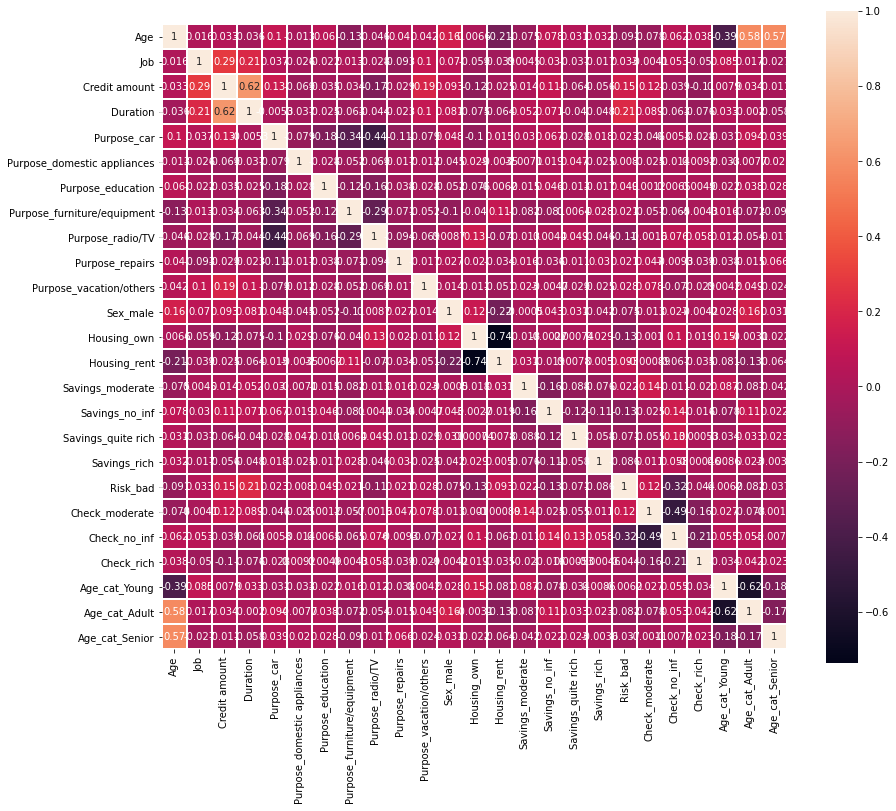

In [10]:
plt.figure(figsize=(14,12))
sns.heatmap(df_credit.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white', annot=True)
plt.show()

In [11]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score # to split the data
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score, roc_auc_score #To evaluate our model

from sklearn.model_selection import GridSearchCV

# Algorithmns models to be compared
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [12]:
df_credit['Risk_bad']

0      0
1      1
2      0
3      0
4      1
      ..
995    0
996    0
997    0
998    1
999    0
Name: Risk_bad, Length: 1000, dtype: uint8

In [13]:
df_credit['Credit amount'] = np.log(df_credit['Credit amount'])

In [14]:
#Creating the X and y variables
X = df_credit.drop('Risk_bad', 1).values
y = df_credit["Risk_bad"].values

# Spliting X and y into train and test version
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

<ipython-input-14-9633a861b1bc>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df_credit.drop('Risk_bad', 1).values


In [15]:
df_credit.columns

Index(['Age', 'Job', 'Credit amount', 'Duration', 'Purpose_car',
       'Purpose_domestic appliances', 'Purpose_education',
       'Purpose_furniture/equipment', 'Purpose_radio/TV', 'Purpose_repairs',
       'Purpose_vacation/others', 'Sex_male', 'Housing_own', 'Housing_rent',
       'Savings_moderate', 'Savings_no_inf', 'Savings_quite rich',
       'Savings_rich', 'Risk_bad', 'Check_moderate', 'Check_no_inf',
       'Check_rich', 'Age_cat_Young', 'Age_cat_Adult', 'Age_cat_Senior'],
      dtype='object')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1405, in fit
    fold_coefs_ = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatc

LR: nan (nan)
LDA: 0.428815 (0.093162)
KNN: 0.263130 (0.035560)
CART: 0.526656 (0.114118)
NB: 0.596300 (0.081365)
RF: 0.363471 (0.067974)
SVM: 0.182230 (0.088462)
[00:30:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:30:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:30:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:30:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:30:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the o

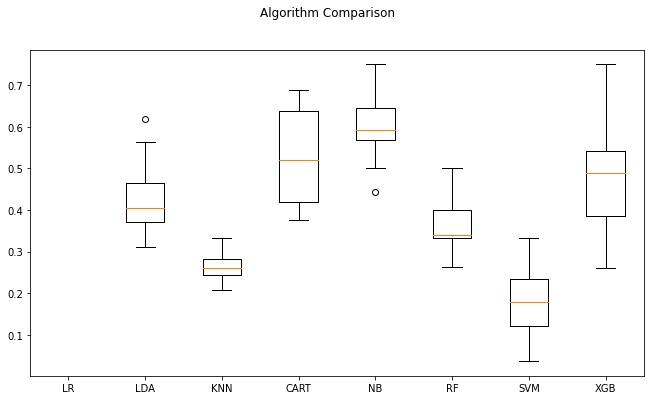

In [16]:
# to feed the random state
seed = 7

# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('XGB', XGBClassifier()))

# evaluate each model in turn
results = []
names = []
scoring = 'recall'

for name, model in models:
        kfold = KFold(n_splits=10)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
# boxplot algorithm comparison
fig = plt.figure(figsize=(11,6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Very interesting. Almost all models shows a low value to recall. 

We can observe that our best results was with CART, NB and XGBoost. <br>
I will implement some models and try to do a simple Tunning on them

# **6. Preprocessing:** <a id="Preprocessing"></a> <br>
- Importing ML librarys
- Setting X and y variables to the prediction
- Splitting Data


# **7.1 Model 1 :** <a id="Modelling 1"></a> <br>
- Using Random Forest to predictict the credit score 
- Some of Validation Parameters

In [68]:
#Seting the Hyper Parameters
param_grid = {"max_depth": [3,5, 7, 10,None],
              "n_estimators":[3,5,10,25,50,150],
              "max_features": [4,7,15,20,24]}

#Creating the classifier
model = RandomForestClassifier(random_state=2)

grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='recall', verbose=4)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits
[CV] max_depth=3, max_features=4, n_estimators=3 .....................
[CV]  max_depth=3, max_features=4, n_estimators=3, score=0.022, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=3 .....................
[CV]  max_depth=3, max_features=4, n_estimators=3, score=0.111, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=3 .....................
[CV]  max_depth=3, max_features=4, n_estimators=3, score=0.065, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=3 .....................
[CV]  max_depth=3, max_features=4, n_estimators=3, score=0.196, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=3 .....................
[CV]  max_depth=3, max_features=4, n_estimators=3, score=0.087, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=5 .....................
[CV]  max_depth=3, max_features=4, n_estimators=5, score=0.044, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimat

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=3, max_features=4, n_estimators=25, score=0.022, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=25 ....................
[CV]  max_depth=3, max_features=4, n_estimators=25, score=0.067, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=25 ....................
[CV]  max_depth=3, max_features=4, n_estimators=25, score=0.043, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=25 ....................
[CV]  max_depth=3, max_features=4, n_estimators=25, score=0.022, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=25 ....................
[CV]  max_depth=3, max_features=4, n_estimators=25, score=0.022, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=50 ....................
[CV]  max_depth=3, max_features=4, n_estimators=50, score=0.022, total=   0.1s
[CV] max_depth=3, max_features=4, n_estimators=50 ....................
[CV]  max_depth=3, max_features=4, n_estimators=50, score=0.089, total=   0.1s
[CV] max_depth=3, max

[CV]  max_depth=3, max_features=15, n_estimators=25, score=0.311, total=   0.0s
[CV] max_depth=3, max_features=15, n_estimators=25 ...................
[CV]  max_depth=3, max_features=15, n_estimators=25, score=0.196, total=   0.0s
[CV] max_depth=3, max_features=15, n_estimators=25 ...................
[CV]  max_depth=3, max_features=15, n_estimators=25, score=0.217, total=   0.0s
[CV] max_depth=3, max_features=15, n_estimators=25 ...................
[CV]  max_depth=3, max_features=15, n_estimators=25, score=0.283, total=   0.0s
[CV] max_depth=3, max_features=15, n_estimators=50 ...................
[CV]  max_depth=3, max_features=15, n_estimators=50, score=0.200, total=   0.1s
[CV] max_depth=3, max_features=15, n_estimators=50 ...................
[CV]  max_depth=3, max_features=15, n_estimators=50, score=0.289, total=   0.1s
[CV] max_depth=3, max_features=15, n_estimators=50 ...................
[CV]  max_depth=3, max_features=15, n_estimators=50, score=0.217, total=   0.1s
[CV] max_depth

[CV]  max_depth=3, max_features=24, n_estimators=25, score=0.217, total=   0.0s
[CV] max_depth=3, max_features=24, n_estimators=25 ...................
[CV]  max_depth=3, max_features=24, n_estimators=25, score=0.196, total=   0.0s
[CV] max_depth=3, max_features=24, n_estimators=25 ...................
[CV]  max_depth=3, max_features=24, n_estimators=25, score=0.261, total=   0.0s
[CV] max_depth=3, max_features=24, n_estimators=50 ...................
[CV]  max_depth=3, max_features=24, n_estimators=50, score=0.178, total=   0.1s
[CV] max_depth=3, max_features=24, n_estimators=50 ...................
[CV]  max_depth=3, max_features=24, n_estimators=50, score=0.356, total=   0.1s
[CV] max_depth=3, max_features=24, n_estimators=50 ...................
[CV]  max_depth=3, max_features=24, n_estimators=50, score=0.217, total=   0.1s
[CV] max_depth=3, max_features=24, n_estimators=50 ...................
[CV]  max_depth=3, max_features=24, n_estimators=50, score=0.283, total=   0.1s
[CV] max_depth

[CV]  max_depth=5, max_features=7, n_estimators=25, score=0.239, total=   0.0s
[CV] max_depth=5, max_features=7, n_estimators=25 ....................
[CV]  max_depth=5, max_features=7, n_estimators=25, score=0.261, total=   0.0s
[CV] max_depth=5, max_features=7, n_estimators=25 ....................
[CV]  max_depth=5, max_features=7, n_estimators=25, score=0.261, total=   0.0s
[CV] max_depth=5, max_features=7, n_estimators=50 ....................
[CV]  max_depth=5, max_features=7, n_estimators=50, score=0.178, total=   0.1s
[CV] max_depth=5, max_features=7, n_estimators=50 ....................
[CV]  max_depth=5, max_features=7, n_estimators=50, score=0.356, total=   0.1s
[CV] max_depth=5, max_features=7, n_estimators=50 ....................
[CV]  max_depth=5, max_features=7, n_estimators=50, score=0.217, total=   0.1s
[CV] max_depth=5, max_features=7, n_estimators=50 ....................
[CV]  max_depth=5, max_features=7, n_estimators=50, score=0.217, total=   0.1s
[CV] max_depth=5, max

[CV]  max_depth=5, max_features=20, n_estimators=25, score=0.244, total=   0.0s
[CV] max_depth=5, max_features=20, n_estimators=25 ...................
[CV]  max_depth=5, max_features=20, n_estimators=25, score=0.444, total=   0.0s
[CV] max_depth=5, max_features=20, n_estimators=25 ...................
[CV]  max_depth=5, max_features=20, n_estimators=25, score=0.283, total=   0.0s
[CV] max_depth=5, max_features=20, n_estimators=25 ...................
[CV]  max_depth=5, max_features=20, n_estimators=25, score=0.304, total=   0.0s
[CV] max_depth=5, max_features=20, n_estimators=25 ...................
[CV]  max_depth=5, max_features=20, n_estimators=25, score=0.413, total=   0.0s
[CV] max_depth=5, max_features=20, n_estimators=50 ...................
[CV]  max_depth=5, max_features=20, n_estimators=50, score=0.311, total=   0.1s
[CV] max_depth=5, max_features=20, n_estimators=50 ...................
[CV]  max_depth=5, max_features=20, n_estimators=50, score=0.422, total=   0.1s
[CV] max_depth

[CV]  max_depth=7, max_features=4, n_estimators=25, score=0.311, total=   0.0s
[CV] max_depth=7, max_features=4, n_estimators=25 ....................
[CV]  max_depth=7, max_features=4, n_estimators=25, score=0.261, total=   0.0s
[CV] max_depth=7, max_features=4, n_estimators=25 ....................
[CV]  max_depth=7, max_features=4, n_estimators=25, score=0.239, total=   0.0s
[CV] max_depth=7, max_features=4, n_estimators=25 ....................
[CV]  max_depth=7, max_features=4, n_estimators=25, score=0.283, total=   0.0s
[CV] max_depth=7, max_features=4, n_estimators=50 ....................
[CV]  max_depth=7, max_features=4, n_estimators=50, score=0.200, total=   0.1s
[CV] max_depth=7, max_features=4, n_estimators=50 ....................
[CV]  max_depth=7, max_features=4, n_estimators=50, score=0.333, total=   0.1s
[CV] max_depth=7, max_features=4, n_estimators=50 ....................
[CV]  max_depth=7, max_features=4, n_estimators=50, score=0.217, total=   0.1s
[CV] max_depth=7, max

[CV]  max_depth=7, max_features=15, n_estimators=25, score=0.422, total=   0.0s
[CV] max_depth=7, max_features=15, n_estimators=25 ...................
[CV]  max_depth=7, max_features=15, n_estimators=25, score=0.326, total=   0.0s
[CV] max_depth=7, max_features=15, n_estimators=25 ...................
[CV]  max_depth=7, max_features=15, n_estimators=25, score=0.326, total=   0.0s
[CV] max_depth=7, max_features=15, n_estimators=25 ...................
[CV]  max_depth=7, max_features=15, n_estimators=25, score=0.457, total=   0.0s
[CV] max_depth=7, max_features=15, n_estimators=50 ...................
[CV]  max_depth=7, max_features=15, n_estimators=50, score=0.289, total=   0.1s
[CV] max_depth=7, max_features=15, n_estimators=50 ...................
[CV]  max_depth=7, max_features=15, n_estimators=50, score=0.467, total=   0.1s
[CV] max_depth=7, max_features=15, n_estimators=50 ...................
[CV]  max_depth=7, max_features=15, n_estimators=50, score=0.457, total=   0.1s
[CV] max_depth

[CV]  max_depth=7, max_features=24, n_estimators=10, score=0.522, total=   0.0s
[CV] max_depth=7, max_features=24, n_estimators=25 ...................
[CV]  max_depth=7, max_features=24, n_estimators=25, score=0.333, total=   0.0s
[CV] max_depth=7, max_features=24, n_estimators=25 ...................
[CV]  max_depth=7, max_features=24, n_estimators=25, score=0.422, total=   0.0s
[CV] max_depth=7, max_features=24, n_estimators=25 ...................
[CV]  max_depth=7, max_features=24, n_estimators=25, score=0.370, total=   0.0s
[CV] max_depth=7, max_features=24, n_estimators=25 ...................
[CV]  max_depth=7, max_features=24, n_estimators=25, score=0.348, total=   0.0s
[CV] max_depth=7, max_features=24, n_estimators=25 ...................
[CV]  max_depth=7, max_features=24, n_estimators=25, score=0.522, total=   0.0s
[CV] max_depth=7, max_features=24, n_estimators=50 ...................
[CV]  max_depth=7, max_features=24, n_estimators=50, score=0.356, total=   0.1s
[CV] max_depth

[CV]  max_depth=10, max_features=7, n_estimators=25, score=0.378, total=   0.0s
[CV] max_depth=10, max_features=7, n_estimators=25 ...................
[CV]  max_depth=10, max_features=7, n_estimators=25, score=0.435, total=   0.0s
[CV] max_depth=10, max_features=7, n_estimators=25 ...................
[CV]  max_depth=10, max_features=7, n_estimators=25, score=0.413, total=   0.0s
[CV] max_depth=10, max_features=7, n_estimators=25 ...................
[CV]  max_depth=10, max_features=7, n_estimators=25, score=0.413, total=   0.0s
[CV] max_depth=10, max_features=7, n_estimators=50 ...................
[CV]  max_depth=10, max_features=7, n_estimators=50, score=0.289, total=   0.1s
[CV] max_depth=10, max_features=7, n_estimators=50 ...................
[CV]  max_depth=10, max_features=7, n_estimators=50, score=0.400, total=   0.1s
[CV] max_depth=10, max_features=7, n_estimators=50 ...................
[CV]  max_depth=10, max_features=7, n_estimators=50, score=0.457, total=   0.1s
[CV] max_depth

[CV]  max_depth=10, max_features=20, n_estimators=25, score=0.356, total=   0.0s
[CV] max_depth=10, max_features=20, n_estimators=25 ..................
[CV]  max_depth=10, max_features=20, n_estimators=25, score=0.444, total=   0.0s
[CV] max_depth=10, max_features=20, n_estimators=25 ..................
[CV]  max_depth=10, max_features=20, n_estimators=25, score=0.478, total=   0.0s
[CV] max_depth=10, max_features=20, n_estimators=25 ..................
[CV]  max_depth=10, max_features=20, n_estimators=25, score=0.391, total=   0.0s
[CV] max_depth=10, max_features=20, n_estimators=25 ..................
[CV]  max_depth=10, max_features=20, n_estimators=25, score=0.565, total=   0.0s
[CV] max_depth=10, max_features=20, n_estimators=50 ..................
[CV]  max_depth=10, max_features=20, n_estimators=50, score=0.333, total=   0.1s
[CV] max_depth=10, max_features=20, n_estimators=50 ..................
[CV]  max_depth=10, max_features=20, n_estimators=50, score=0.444, total=   0.1s
[CV] ma

[CV]  max_depth=None, max_features=4, n_estimators=25, score=0.378, total=   0.0s
[CV] max_depth=None, max_features=4, n_estimators=25 .................
[CV]  max_depth=None, max_features=4, n_estimators=25, score=0.500, total=   0.0s
[CV] max_depth=None, max_features=4, n_estimators=25 .................
[CV]  max_depth=None, max_features=4, n_estimators=25, score=0.391, total=   0.0s
[CV] max_depth=None, max_features=4, n_estimators=25 .................
[CV]  max_depth=None, max_features=4, n_estimators=25, score=0.348, total=   0.0s
[CV] max_depth=None, max_features=4, n_estimators=50 .................
[CV]  max_depth=None, max_features=4, n_estimators=50, score=0.311, total=   0.1s
[CV] max_depth=None, max_features=4, n_estimators=50 .................
[CV]  max_depth=None, max_features=4, n_estimators=50, score=0.378, total=   0.1s
[CV] max_depth=None, max_features=4, n_estimators=50 .................
[CV]  max_depth=None, max_features=4, n_estimators=50, score=0.457, total=   0.1s


[CV]  max_depth=None, max_features=15, n_estimators=25, score=0.311, total=   0.0s
[CV] max_depth=None, max_features=15, n_estimators=25 ................
[CV]  max_depth=None, max_features=15, n_estimators=25, score=0.467, total=   0.0s
[CV] max_depth=None, max_features=15, n_estimators=25 ................
[CV]  max_depth=None, max_features=15, n_estimators=25, score=0.522, total=   0.1s
[CV] max_depth=None, max_features=15, n_estimators=25 ................
[CV]  max_depth=None, max_features=15, n_estimators=25, score=0.348, total=   0.0s
[CV] max_depth=None, max_features=15, n_estimators=25 ................
[CV]  max_depth=None, max_features=15, n_estimators=25, score=0.500, total=   0.0s
[CV] max_depth=None, max_features=15, n_estimators=50 ................
[CV]  max_depth=None, max_features=15, n_estimators=50, score=0.422, total=   0.1s
[CV] max_depth=None, max_features=15, n_estimators=50 ................
[CV]  max_depth=None, max_features=15, n_estimators=50, score=0.444, total= 

[CV]  max_depth=None, max_features=24, n_estimators=10, score=0.478, total=   0.0s
[CV] max_depth=None, max_features=24, n_estimators=25 ................
[CV]  max_depth=None, max_features=24, n_estimators=25, score=0.400, total=   0.1s
[CV] max_depth=None, max_features=24, n_estimators=25 ................
[CV]  max_depth=None, max_features=24, n_estimators=25, score=0.489, total=   0.0s
[CV] max_depth=None, max_features=24, n_estimators=25 ................
[CV]  max_depth=None, max_features=24, n_estimators=25, score=0.522, total=   0.0s
[CV] max_depth=None, max_features=24, n_estimators=25 ................
[CV]  max_depth=None, max_features=24, n_estimators=25, score=0.391, total=   0.0s
[CV] max_depth=None, max_features=24, n_estimators=25 ................
[CV]  max_depth=None, max_features=24, n_estimators=25, score=0.500, total=   0.1s
[CV] max_depth=None, max_features=24, n_estimators=50 ................
[CV]  max_depth=None, max_features=24, n_estimators=50, score=0.400, total= 

[Parallel(n_jobs=1)]: Done 750 out of 750 | elapsed:   43.9s finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=2),
             param_grid={'max_depth': [3, 5, 7, 10, None],
                         'max_features': [4, 7, 15, 20, 24],
                         'n_estimators': [3, 5, 10, 25, 50, 150]},
             scoring='recall', verbose=4)

In [69]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.5171014492753623
{'max_depth': None, 'max_features': 24, 'n_estimators': 5}


In [82]:
rf = RandomForestClassifier(max_depth=None, max_features=20, n_estimators=3, random_state=0)
# rf = RandomForestClassifier(max_depth=None, max_features=7, n_estimators=3, random_state=0)

#trainning with the best params
rf.fit(X_train, y_train)

RandomForestClassifier(max_features=20, n_estimators=3, random_state=0)

In [83]:
#Testing the model 
#Predicting using our  model
y_pred = rf.predict(X_test)
y_pred_prob=rf.predict_proba(X_test)
# Verificaar os resultados obtidos
print(accuracy_score(y_test,y_pred))
# print(roc_auc_score(y_test,y_pred))
print(roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))
print("\n")
print(confusion_matrix(y_test, y_pred))
print("\n")
print(fbeta_score(y_test, y_pred, beta=2))

0.712
0.7157849563046191


[[147  31]
 [ 41  31]]


0.4428571428571429


Text(0.5, 1.0, 'ROC curve of the RandomForestClassifier')

<Figure size 720x720 with 0 Axes>

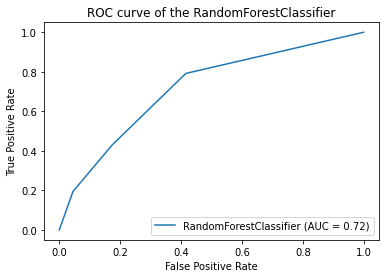

In [115]:
from sklearn.metrics import plot_roc_curve
plt.figure(figsize=(10,10))
plot_roc_curve(rf, X_test, y_test) 
plt.title('ROC curve of the RandomForestClassifier')

## Task 2

In [84]:
df_credit.columns

Index(['Age', 'Job', 'Credit amount', 'Duration', 'Purpose_car',
       'Purpose_domestic appliances', 'Purpose_education',
       'Purpose_furniture/equipment', 'Purpose_radio/TV', 'Purpose_repairs',
       'Purpose_vacation/others', 'Sex_male', 'Housing_own', 'Housing_rent',
       'Savings_moderate', 'Savings_no_inf', 'Savings_quite rich',
       'Savings_rich', 'Risk_bad', 'Check_moderate', 'Check_no_inf',
       'Check_rich', 'Age_cat_Young', 'Age_cat_Adult', 'Age_cat_Senior'],
      dtype='object')

In [85]:
test_df =  pd.DataFrame(X_test, columns=['Age', 'Job', 'Credit amount', 'Duration', 'Purpose_car',
       'Purpose_domestic appliances', 'Purpose_education',
       'Purpose_furniture/equipment', 'Purpose_radio/TV', 'Purpose_repairs',
       'Purpose_vacation/others', 'Sex_male', 'Housing_own', 'Housing_rent',
       'Savings_moderate', 'Savings_no_inf', 'Savings_quite rich',
       'Savings_rich', 'Check_moderate', 'Check_no_inf',
       'Check_rich', 'Age_cat_Young', 'Age_cat_Adult', 'Age_cat_Senior'])

In [86]:
test_df['Risk_bad'] = y_test

In [87]:
test_df['Sex_male']

0      0.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
245    1.0
246    1.0
247    1.0
248    1.0
249    1.0
Name: Sex_male, Length: 250, dtype: float64

### Anti-Classifiction

In [88]:
age_df = test_df.copy()
# student_age = []

# for i, row in age_df.iterrows():
#     if row.Age_cat_Young == 0.0 and row.Age_cat_Adult == 0.0 and row.Age_cat_Senior == 0.0:
#         student_age.append(1.0)
#     else:
#         student_age.append(0.0)
        
# age_df['Age_cat_Student'] = student_age

# age_df

In [89]:
age_df = age_df.drop('predicted_risk_bad', 1)

KeyError: "['predicted_risk_bad'] not found in axis"

In [140]:
def get_different(a1, a2):
    # 1 is bad
    diff = np.subtract(a1, a2)
    good_to_bad = len([int(x) for x in diff if x == -1])  # 0 to 1
    bad_to_good = len([int(x) for x in diff if x == 1])   # 1 to 0
    
    return good_to_bad, bad_to_good

get_different([1,1,0,0], [0,0,1,1])

(2, 2)

In [143]:
def anti_class_m_age(age_df, rf):
    test_young_df = age_df.copy()
    test_adult_df = age_df.copy()
    test_senior_df = age_df.copy()
    test_student_df = age_df.copy()
    
    control_df = age_df.copy()
    
    test_control = control_df.drop('Risk_bad',1).values
    y_preds = rf.predict(test_control)
    y_preds_prob = rf.predict_proba(test_control)
    
    
    test_young_df['Age_cat_Young'] = [1 for x in age_df.Age_cat_Young.values]
    test_young_df['Age_cat_Adult'] = [0 for x in age_df.Age_cat_Young.values]
    test_young_df['Age_cat_Senior'] = [0 for x in age_df.Age_cat_Young.values]
#     test_young_df['Age_cat_Student'] = [0 for x in age_df.Age_cat_Young.values]
    
    test_young = test_young_df.drop('Risk_bad',1).values
    young_preds = rf.predict(test_young)
    young_preds_prob = rf.predict_proba(test_young)
    
    test_adult_df['Age_cat_Young'] = [0 for x in age_df.Age_cat_Young.values]
    test_adult_df['Age_cat_Adult'] = [1 for x in age_df.Age_cat_Young.values]
    test_adult_df['Age_cat_Senior'] = [0 for x in age_df.Age_cat_Young.values]
#     test_adult_df['Age_cat_Student'] = [0 for x in age_df.Age_cat_Young.values]
    
    test_adult = test_adult_df.drop('Risk_bad', 1).values
    adult_preds = rf.predict(test_adult)
    adult_preds_prob = rf.predict_proba(test_adult)
    
    test_senior_df['Age_cat_Young'] = [0 for x in age_df.Age_cat_Young.values]
    test_senior_df['Age_cat_Adult'] = [0 for x in age_df.Age_cat_Young.values]
    test_senior_df['Age_cat_Senior'] = [1 for x in age_df.Age_cat_Young.values]
#     test_senior_df['Age_cat_Student'] = [0 for x in age_df.Age_cat_Young.values]
    
    test_senior = test_senior_df.drop('Risk_bad', 1).values
    senior_preds = rf.predict(test_senior)
    senior_preds_prob = rf.predict_proba(test_senior)
    
    test_student_df['Age_cat_Young'] = [0 for x in age_df.Age_cat_Young.values]
    test_student_df['Age_cat_Adult'] = [0 for x in age_df.Age_cat_Young.values]
    test_student_df['Age_cat_Senior'] = [0 for x in age_df.Age_cat_Young.values]
#     test_student_df['Age_cat_Student'] = [1 for x in age_df.Age_cat_Young.values]
    
    test_student = test_student_df.drop('Risk_bad', 1).values
    student_preds = rf.predict(test_student)
    student_preds_prob = rf.predict_proba(test_student)
    
#     print(y_preds)
    
    y_gtb, y_btg = get_different(y_preds.astype('float'), young_preds.astype('float'))
    a_gtb, a_btg = get_different(y_preds.astype('float'), adult_preds.astype('float'))
    sen_gtb, sen_btg = get_different(y_preds.astype('float'), senior_preds.astype('float'))
    stu_gtb, stu_btg = get_different(y_preds.astype('float'), student_preds.astype('float'))
    
    return {
          "young":{
              "good_to_bad": y_gtb,
              "bad_to_good": y_btg},
          "adult":{
              "good_to_bad": a_gtb,
              "bad_to_good": a_btg},
          "senior":{
              "good_to_bad": sen_gtb,
              "bad_to_good": sen_btg},
          "student":{
              "good_to_bad": stu_gtb,
              "bad_to_good": stu_btg},
          "total_count":len(y_preds)
        }
    

In [144]:
res = anti_class_m_age(age_df,rf)
res

{'young': {'good_to_bad': 15, 'bad_to_good': 2},
 'adult': {'good_to_bad': 3, 'bad_to_good': 11},
 'senior': {'good_to_bad': 5, 'bad_to_good': 13},
 'student': {'good_to_bad': 4, 'bad_to_good': 11},
 'total_count': 250}

In [118]:
res['control']['no_of_risky'],res['young']['no_of_risky'],res['adult']['no_of_risky'], \
res['senior']['no_of_risky'],res['student']['no_of_risky']

(62, 75, 54, 54, 55)

In [93]:
res['control']['no_of_risky']/res['total_count'],res['young']['no_of_risky']/res['total_count'], \
res['adult']['no_of_risky']/res['total_count'], \
res['senior']['no_of_risky']/res['total_count'],res['student']['no_of_risky']/res['total_count']

(0.248, 0.3, 0.216, 0.216, 0.22)

In [94]:
def anti_class_m(test_df,rf):
  test_male_df = test_df.copy()
  test_female_df = test_df.copy()
  control_df = test_df.copy()

  test_male_df['Sex_male'] = [1 for x in test_male_df.Sex_male.values]
  test_female_df['Sex_male'] = [0 for x in test_female_df.Sex_male.values]

  test_control = control_df.drop('Risk_bad',1).values
  y_preds = rf.predict(test_control)
  y_preds_prob = rf.predict_proba(test_control)
  
  test_male = test_male_df.drop('Risk_bad',1).values
  male_preds = rf.predict(test_male)
  male_preds_prob = rf.predict_proba(test_male)
  
  test_female = test_female_df.drop('Risk_bad',1).values
  female_preds = rf.predict(test_female)
  female_preds_prob = rf.predict_proba(test_female)
  return {"control":{
              "no_of_risky": sum(y_preds),
              "prob of risky": y_preds_prob},
          "male":{
              "no_of_risky": sum(male_preds),
              "prob of risky": male_preds_prob},
          "female":{
              "no_of_risky": sum(female_preds),
              "prob of risky": female_preds_prob},
          "total_count":len(y_preds)
        }

In [95]:
res = anti_class_m(test_df,rf)
res['control']['no_of_risky'],res['male']['no_of_risky'],res['female']['no_of_risky']

(62, 65, 58)

In [ ]:
test_male_df = test_df.copy()
test_female_df = test_df.copy()

In [ ]:
test_male_df['Sex_male'] = [1 for x in test_male_df.Sex_male.values]
test_male_df['Sex_male'] 

In [ ]:
test_female_df['Sex_male'] = [0 for x in test_female_df.Sex_male.values]
test_female_df['Sex_male']

In [ ]:
test_male = test_male_df.drop('Risk_bad',1).values
male_preds = rf.predict(test_male)
male_preds_prob = rf.predict_proba(test_male)

In [ ]:
test_female = test_female_df.drop('Risk_bad',1).values
female_preds = rf.predict(test_female)
female_preds_prob = rf.predict_proba(test_female)

In [ ]:
sum(male_preds),sum(female_preds),sum(y_pred)

### Anti Classification 2

In [96]:
def anti_class_2(test_df,rf):
    control_df = test_df.copy()
    test_df_flipped=test_df.copy()
    test_df_flipped['Sex_male'] = [1-x for x in test_df_flipped.Sex_male.values]
    test_flipped = test_df_flipped.drop('Risk_bad', 1).values
    test_control = control_df.drop('Risk_bad', 1).values
    flipped_preds = rf.predict(test_flipped)
    flipped_preds_prob = rf.predict_proba(test_flipped)
    y_preds = rf.predict(test_control)
    y_preds_prob = rf.predict_proba(test_control)
    differences = 0
    for i in range(len(y_pred)):
      if y_preds[i] != flipped_preds[i]:
        differences += 1

    return (differences,differences/len(y_pred))

In [97]:
anti_class_2(test_df,rf)

(11, 0.044)

In [ ]:
test_df_flipped=test_df.copy()
test_df_flipped['Sex_male'] = [1-x for x in test_df_flipped.Sex_male.values]
test_df_flipped['Sex_male'] #It is properly flipped

In [ ]:
test_flipped = test_df_flipped.drop('Risk_bad', 1).values
flipped_preds = rf.predict(test_flipped)
flipped_preds_prob = rf.predict_proba(test_flipped)

In [ ]:
differences = 0

for i in range(len(y_pred)):
  if y_pred[i] != flipped_preds[i]:
    differences += 1

print(differences,differences/len(y_pred))

In [ ]:
differences=0

for i in range(len(y_pred)):
  # print(y_pred_prob[i][0],flipped_preds_prob[i][0])
  if abs(y_pred_prob[i][1]-flipped_preds_prob[i][1]) >= 0.33:
      print(y_pred_prob[i][1],flipped_preds_prob[i][1])

      differences+=1
print(differences)

### Group Fairness

In [98]:
def group_fair_age(age_df, rf):
    
#     test_young_df = age_df.copy()
#     test_adult_df = age_df.copy()
#     test_senior_df = age_df.copy()
#     test_student_df = age_df.copy()
    
#     control_df = age_df.copy()

    temp_df = age_df.copy()
    test_control = temp_df.drop('Risk_bad',1).values
    y_preds = rf.predict(test_control)
    y_preds_prob = rf.predict_proba(test_control)
    temp_df['predicted_risk_bad'] = y_preds
    
    # young, adult, senior, student
    risky_young = len(temp_df[temp_df.Age_cat_Young == 1][temp_df.predicted_risk_bad == 1])
    risky_adult = len(temp_df[temp_df.Age_cat_Adult == 1][temp_df.predicted_risk_bad == 1])
    risky_senior = len(temp_df[temp_df.Age_cat_Senior == 1][temp_df.predicted_risk_bad == 1])
    risky_student = len(temp_df[temp_df.Age_cat_Young == 0][temp_df.Age_cat_Adult == 0][temp_df.Age_cat_Senior == 0][temp_df.predicted_risk_bad == 1])
    
    
    total_young = len(temp_df[temp_df.Age_cat_Young == 1])
    total_adult = len(temp_df[temp_df.Age_cat_Adult == 1])
    total_senior = len(temp_df[temp_df.Age_cat_Senior == 1])
    total_student = len(temp_df[temp_df.Age_cat_Young == 0][temp_df.Age_cat_Adult == 0][temp_df.Age_cat_Senior == 0])
    
    return {
      "risky_young": risky_young,
      "risky_adult": risky_adult,
      "risky_senior": risky_senior,
      "risky_student": risky_student,
        
      "total_young": total_young,
      "total_adult": total_adult,
      "total_senior": total_senior,
      "total_student": total_student,
        
      "percent_risky_young": risky_young/total_young,
      "percent_risky_adult": risky_adult/total_adult,
      "percent_risky_senior": risky_senior/total_senior,
      "percent_risky_student": risky_student/total_student
  } 
    

In [99]:
group_fair_age(age_df,rf)

{'risky_young': 19,
 'risky_adult': 17,
 'risky_senior': 2,
 'risky_student': 24,
 'total_young': 94,
 'total_adult': 92,
 'total_senior': 13,
 'total_student': 51,
 'percent_risky_young': 0.20212765957446807,
 'percent_risky_adult': 0.18478260869565216,
 'percent_risky_senior': 0.15384615384615385,
 'percent_risky_student': 0.47058823529411764}

In [100]:
def group_fair(test_df,rf):
  temp_df = test_df.copy()
  test_control = temp_df.drop('Risk_bad',1).values
  y_preds = rf.predict(test_control)
  y_preds_prob = rf.predict_proba(test_control)
  temp_df['predicted_risk_bad'] = y_preds
  risky_male = len(temp_df[temp_df.Sex_male == 1][temp_df.predicted_risk_bad == 1])
  risky_female = len(temp_df[temp_df.Sex_male == 0][temp_df.predicted_risk_bad == 1])
  total_male = len(temp_df[temp_df.Sex_male == 1])
  total_female = len(temp_df[temp_df.Sex_male == 0])

  return {
      "risky_males": risky_male,
      "risky_females": risky_female,
      "total_males": total_male,
      "total_females": total_female,
      "percent_risky_males": risky_male/total_male,
      "percent_risky_female": risky_female/total_female
  }

In [101]:
group_fair(test_df,rf)

{'risky_males': 44,
 'risky_females': 18,
 'total_males': 177,
 'total_females': 73,
 'percent_risky_males': 0.24858757062146894,
 'percent_risky_female': 0.2465753424657534}

In [ ]:
test_df['predicted_risk_bad'] = y_pred
test_df

In [ ]:
test_df[test_df.Sex_male == 1][test_df.predicted_risk_bad == 0]

In [ ]:
risky_male = len(test_df[test_df.Sex_male == 1][test_df.predicted_risk_bad == 1])
risky_female = len(test_df[test_df.Sex_male == 0][test_df.predicted_risk_bad == 1])

total_male = len(test_df[test_df.Sex_male == 1])
total_female = len(test_df[test_df.Sex_male == 0])
print(risky_female,total_female)
print(risky_male,total_male)
risky_male/total_male, risky_female/total_female

### Seperation

In [102]:
def seperation_age(age_df, rf):
    temp_df = age_df.copy()
    test_control = temp_df.drop('Risk_bad',1).values
    y_preds = rf.predict(test_control)
    temp_df['predicted_risk_bad'] = y_preds
    
    young_df = temp_df[temp_df.Age_cat_Young == 1].copy()
    adult_df = temp_df[temp_df.Age_cat_Adult == 1].copy()
    senior_df = temp_df[temp_df.Age_cat_Senior == 1].copy()
    student_df = temp_df[temp_df.Age_cat_Young == 0][temp_df.Age_cat_Adult == 0][temp_df.Age_cat_Senior == 0].copy()
    
    young_df_fpr = len(young_df[young_df.predicted_risk_bad==0][young_df.Risk_bad==1])/len(young_df[young_df.Risk_bad==1])
    adult_df_fpr = len(adult_df[adult_df.predicted_risk_bad==0][adult_df.Risk_bad==1])/len(adult_df[adult_df.Risk_bad==1])
    senior_df_fpr = len(senior_df[senior_df.predicted_risk_bad==0][senior_df.Risk_bad==1])/len(senior_df[senior_df.Risk_bad==1])
    student_df_fpr = len(student_df[student_df.predicted_risk_bad==0][student_df.Risk_bad==1])/len(student_df[student_df.Risk_bad==1])
    
    young_df_fnr = len(young_df[young_df.predicted_risk_bad==1][young_df.Risk_bad==0])/len(young_df[young_df.Risk_bad==0])
    adult_df_fnr = len(adult_df[adult_df.predicted_risk_bad==1][adult_df.Risk_bad==0])/len(adult_df[adult_df.Risk_bad==0])
    senior_df_fnr = len(senior_df[senior_df.predicted_risk_bad==1][senior_df.Risk_bad==0])/len(senior_df[senior_df.Risk_bad==0])
    student_df_fnr = len(student_df[student_df.predicted_risk_bad==1][student_df.Risk_bad==0])/len(student_df[student_df.Risk_bad==0])
    
    return {
        "young_fpr": young_df_fpr,
        "young_fnr": young_df_fnr,
        
        "adult_fpr": adult_df_fpr,
        "adult_fnr": adult_df_fnr,
        
        "senior_fpr": senior_df_fpr,
        "senior_fnr": senior_df_fnr,
        
        "student_fpr": student_df_fpr,
        "student_fnr": student_df_fnr,
    }
    
    
    

In [103]:
seperation_age(age_df, rf)

{'young_fpr': 0.6,
 'young_fnr': 0.13043478260869565,
 'adult_fpr': 0.64,
 'adult_fnr': 0.11940298507462686,
 'senior_fpr': 0.8,
 'senior_fnr': 0.125,
 'student_fpr': 0.35294117647058826,
 'student_fnr': 0.38235294117647056}

In [106]:
def seperation(test_df,rf):
  temp_df = test_df.copy()
  test_control = temp_df.drop('Risk_bad',1).values
  y_preds = rf.predict(test_control)
  temp_df['predicted_risk_bad'] = y_preds
  male_df = temp_df[test_df.Sex_male==1].copy()
  female_df = temp_df[test_df.Sex_male==0].copy()
  male_df_fpr = len(male_df[male_df.predicted_risk_bad==0][male_df.Risk_bad==1])/len(male_df[male_df.Risk_bad==1])
  male_df_fnr = len(male_df[male_df.predicted_risk_bad==1][male_df.Risk_bad==0])/len(male_df[male_df.Risk_bad==0])
  female_df_fpr = len(female_df[female_df.predicted_risk_bad==0][female_df.Risk_bad==1])/len(female_df[female_df.Risk_bad==1])
  female_df_fnr = len(female_df[female_df.predicted_risk_bad==1][female_df.Risk_bad==0])/len(female_df[female_df.Risk_bad==0])
  return {
          "male_false_positive_rate": male_df_fpr,
          "male_false_negative_rate": male_df_fnr,
          "female_false_positive_rate": female_df_fpr,
          "female_false_negative_rate": female_df_fnr,
      }

In [107]:
seperation(test_df,rf)

{'male_false_positive_rate': 0.58,
 'male_false_negative_rate': 0.18110236220472442,
 'female_false_positive_rate': 0.5454545454545454,
 'female_false_negative_rate': 0.1568627450980392}

In [ ]:
male_df = test_df[test_df.Sex_male==1].copy()
female_df = test_df[test_df.Sex_male==0].copy()


In [ ]:
# male_df
male_df_fpr = len(male_df[male_df.predicted_risk_bad==0][male_df.Risk_bad==1])/len(male_df[male_df.Risk_bad==1])
male_df_fnr = len(male_df[male_df.predicted_risk_bad==1][male_df.Risk_bad==0])/len(male_df[male_df.Risk_bad==0])
male_df_fnr,male_df_fpr

In [ ]:
# female_df
female_df_fpr = len(female_df[female_df.predicted_risk_bad==0][female_df.Risk_bad==1])/len(female_df[female_df.Risk_bad==1])
female_df_fnr = len(female_df[female_df.predicted_risk_bad==1][female_df.Risk_bad==0])/len(female_df[female_df.Risk_bad==0])
female_df_fnr,female_df_fpr

## Task 3


### Tackling Anti-Classification
One way to tackle would be to train  a model to not llok at the protected attributes. SO we drop them like it's hot

In [ ]:
df_credit.columns

In [ ]:
df_credit_temp = df_credit.drop('Sex_male',1)
df_credit_temp.columns

In [ ]:

X = df_credit.drop('Risk_bad', 1).values
y = df_credit["Risk_bad"].values

# Spliting X and y into train and test version
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

Very sucks results! How can I increase my model? 

# **7.2 Model 2:** <a id="Modelling 2"></a> <br>

In [ ]:
from sklearn.utils import resample
from sklearn.metrics import roc_curve

In [ ]:
# Criando o classificador logreg
GNB = GaussianNB()

# Fitting with train data
model = GNB.fit(X_train, y_train)

In [ ]:
# Printing the Training Score
print("Training score data: ")
print(model.score(X_train, y_train))

In [ ]:
y_pred = model.predict(X_test)

print(accuracy_score(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

With the Gaussian Model we got a best recall. 

## Let's verify the ROC curve

In [ ]:
#Predicting proba
y_pred_prob = model.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

In [ ]:
features = []
features.append(('pca', PCA(n_components=2)))
features.append(('select_best', SelectKBest(k=6)))
feature_union = FeatureUnion(features)
# create pipeline
estimators = []
estimators.append(('feature_union', feature_union))
estimators.append(('logistic', GaussianNB()))
model = Pipeline(estimators)
# evaluate pipeline
seed = 7
kfold = KFold(n_splits=10)
results = cross_val_score(model, X_train, y_train, cv=kfold)
print(results.mean())

In [ ]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(accuracy_score(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))
print("\n")
print(fbeta_score(y_test, y_pred, beta=2))

## Implementing a pipeline of models 

In [ ]:
#Seting the Hyper Parameters
param_test1 = {
 'max_depth':[3,5,6,10],
 'min_child_weight':[3,5,10],
 'gamma':[0.0, 0.1, 0.2, 0.3, 0.4],
# 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 10],
 'subsample':[i/100.0 for i in range(75,90,5)],
 'colsample_bytree':[i/100.0 for i in range(75,90,5)]
}

#Creating the classifier
model_xg = XGBClassifier(random_state=2)

grid_search = GridSearchCV(model_xg, param_grid=param_test1, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)

How can I avoid of this 

# Please, how can I increase this sucks models ?

In [ ]:
grid_search.best_score_
grid_search.best_params_

In [ ]:
y_pred = grid_search.predict(X_test)

# Verificaar os resultados obtidos
print(accuracy_score(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))

How can I avoid this error? 

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


In [ ]:
print(roc_auc_score(y_test, grid_search.predict_proba(X_test)[:, 1]))